# Download the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [5]:
data=pd.read_csv("C:/Users/dheep/downloads/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Cleaning and preprocessing 

# Handle missing values

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data["Gender"].value_counts()
data["Gender"].replace({"Male":1,"Female":0},inplace=True)
data["Surname"]=data["Surname"].astype(str)

In [9]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
data["Geography"].str.strip()
data["Surname"].str.strip()

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

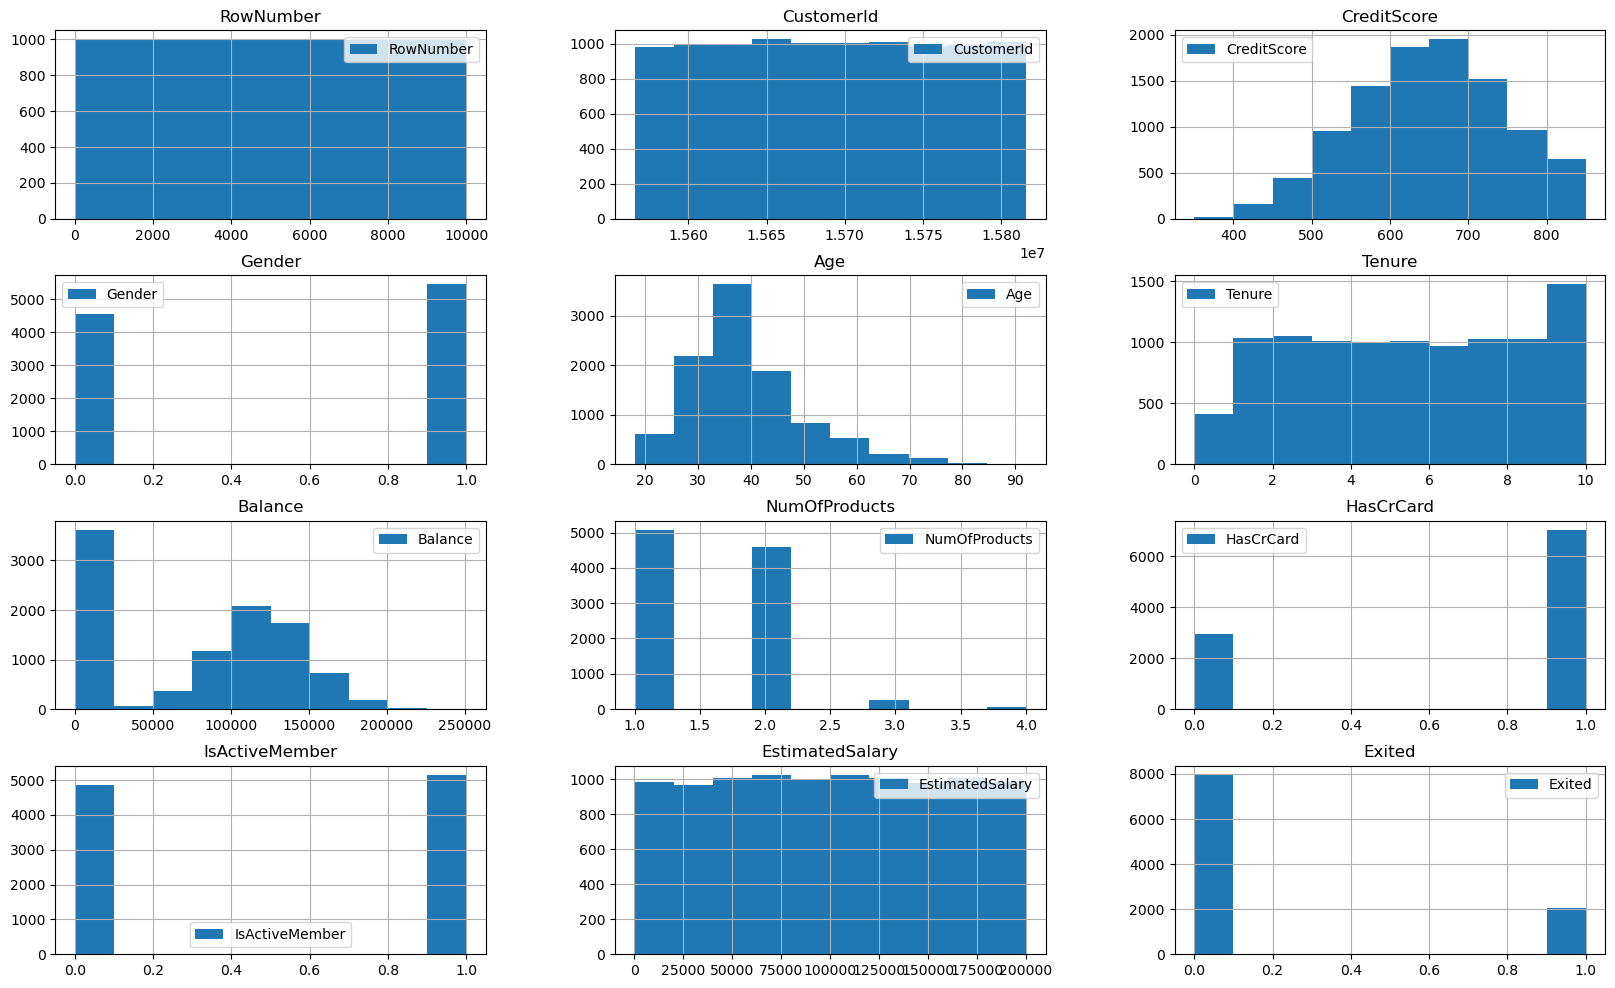

In [11]:
data.hist(figsize=(20,12),legend=True)

In [12]:
data.drop(columns=["RowNumber","CustomerId"],inplace=True)
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [14]:
data.duplicated().value_counts()

False    10000
dtype: int64

<AxesSubplot:>

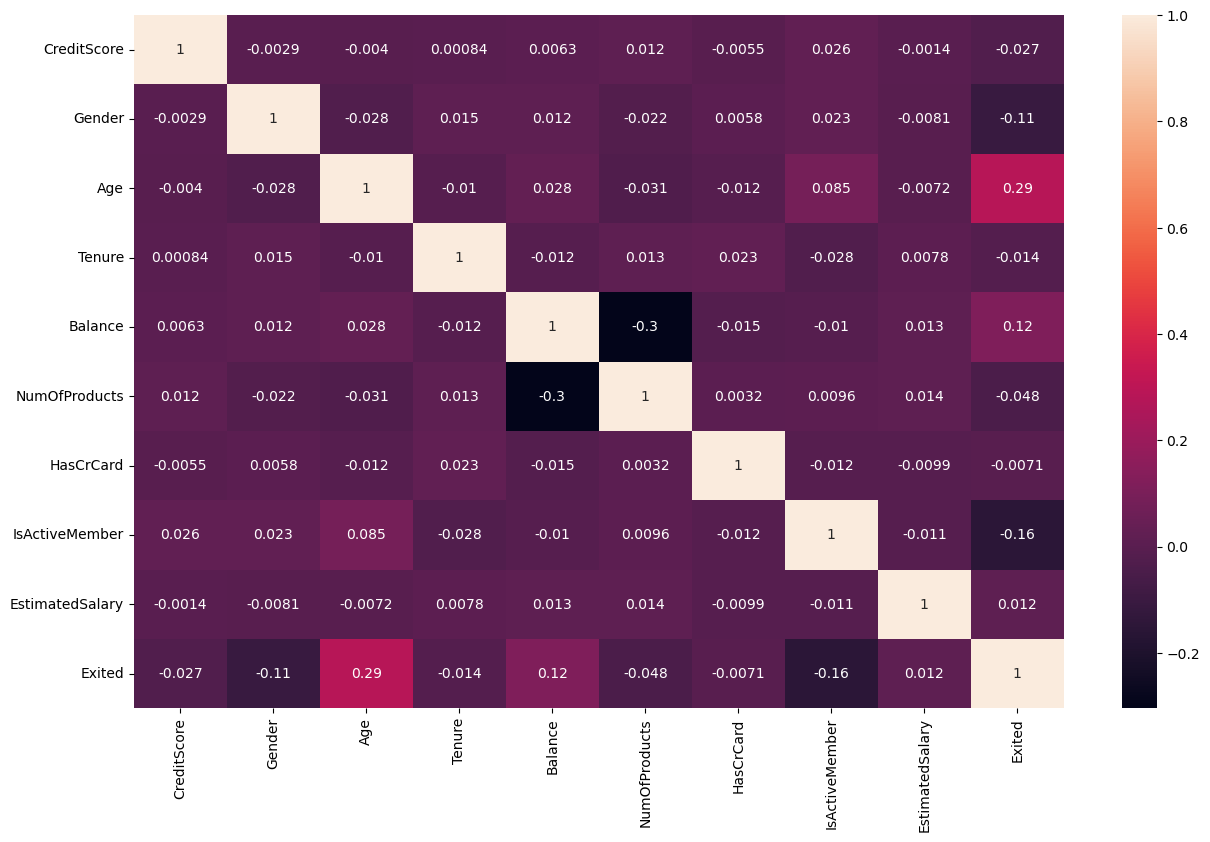

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
#surname also unwanted ,we need to remove
#data.drop(columns="Surname",inplace=True)
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True)

# Descriptive Statistics

In [20]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA Analysis

# Univariate Data Visualisation

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

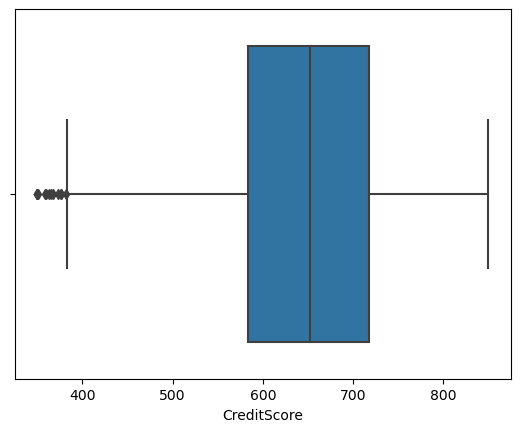

In [21]:
sns.boxplot(data["CreditScore"])

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

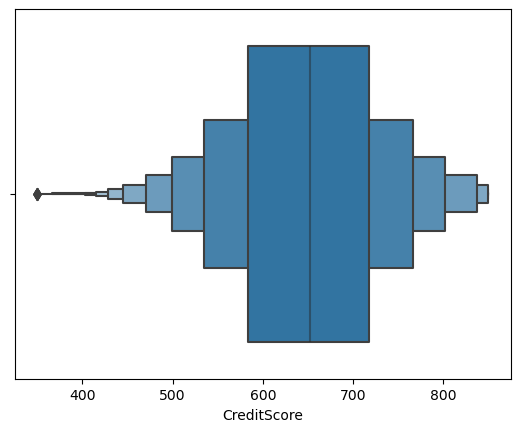

In [22]:
sns.boxenplot(data.CreditScore)

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

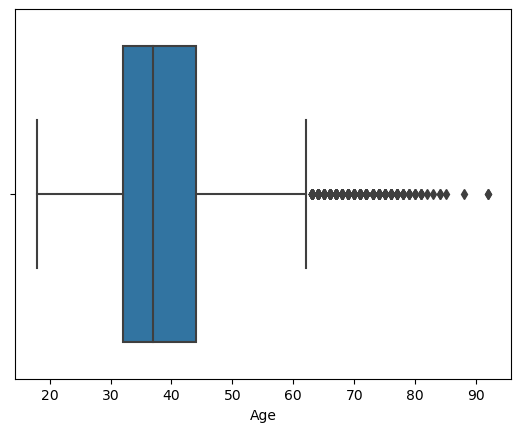

In [23]:
sns.boxplot(data["Age"])

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

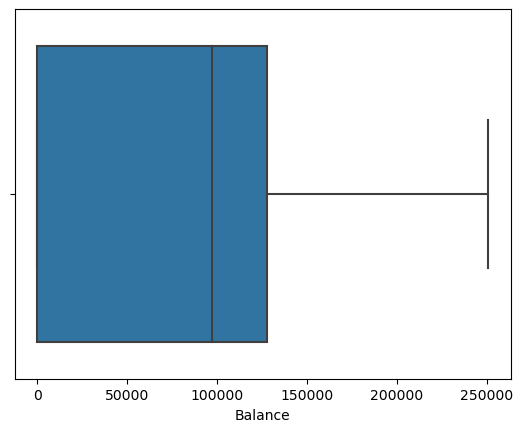

In [24]:
sns.boxplot(data["Balance"])

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

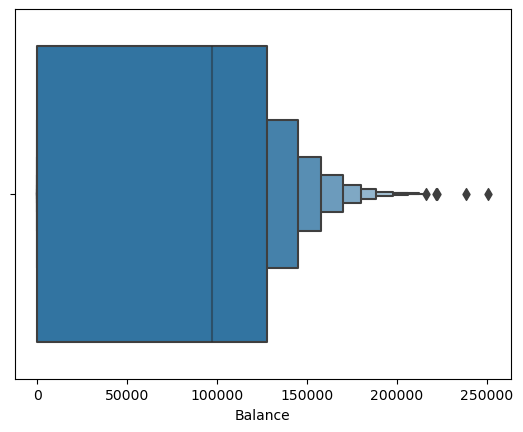

In [25]:
sns.boxenplot(data.Balance)

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

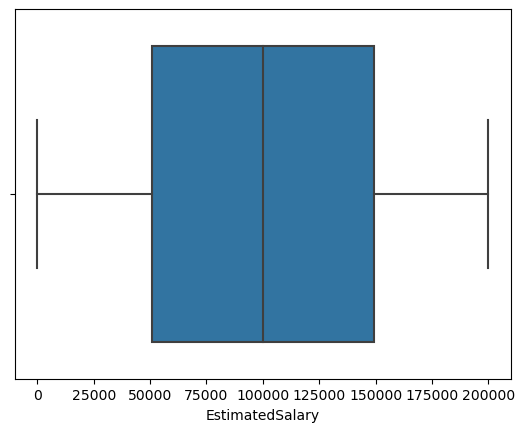

In [26]:
sns.boxplot(data.EstimatedSalary)

# Bi-variate Data Visualisation

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Balance'>

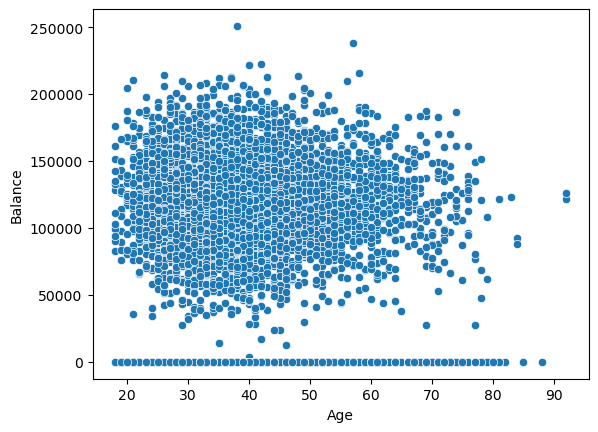

In [27]:
sns.scatterplot(data.Age,data.Balance)

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

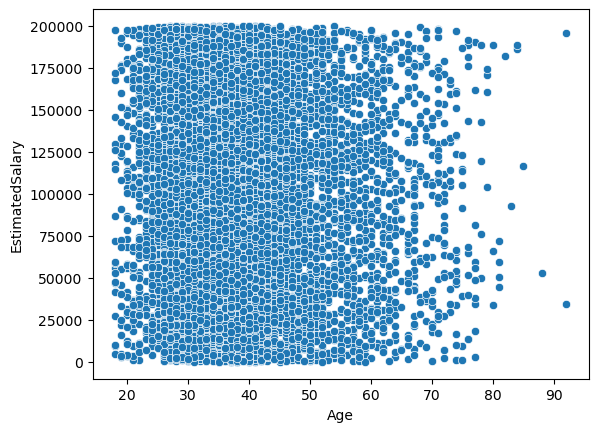

In [28]:
sns.scatterplot(data.Age,data.EstimatedSalary)

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

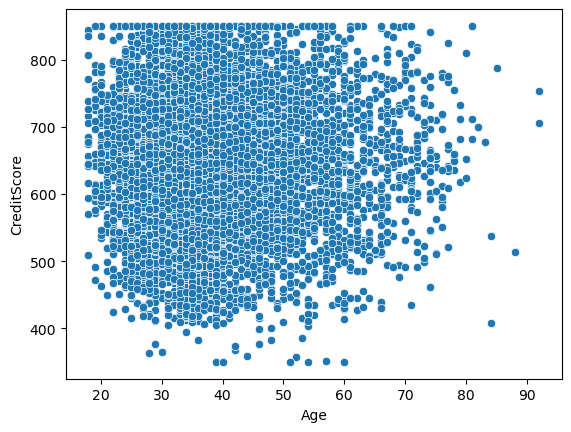

In [29]:
sns.scatterplot(data.Age,data.CreditScore)

C:\Users\dheep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheep\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dheep\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

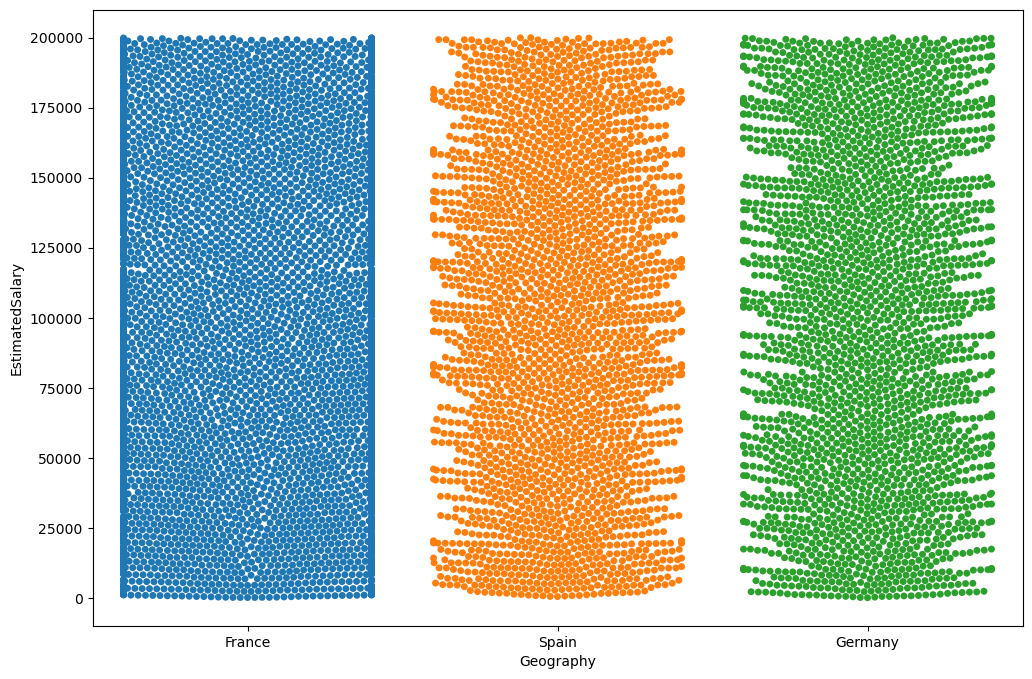

In [31]:
plt.figure(figsize=(12,8))
sns.swarmplot(data.Geography,data.EstimatedSalary,data=data)

# Multi-variate Data Visualisation

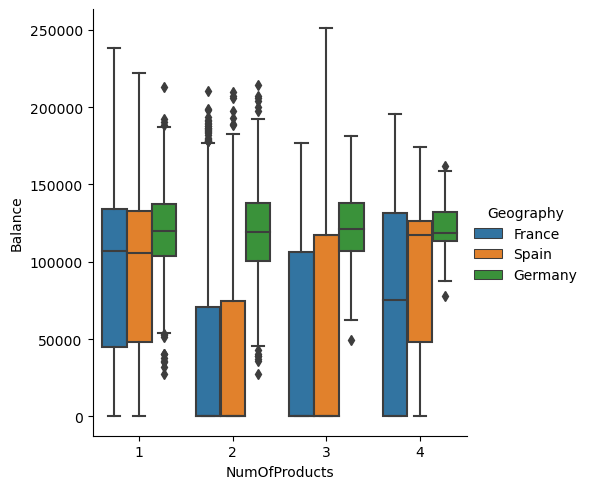

In [32]:
sns.catplot(x="NumOfProducts",y="Balance",data=data,hue="Geography",kind='box')

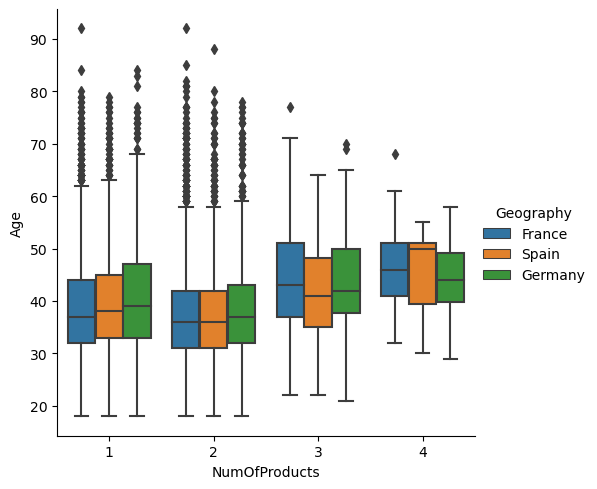

In [33]:
sns.catplot(x="NumOfProducts",y="Age",data=data,hue="Geography",kind='box')

<AxesSubplot:xlabel='IsActiveMember', ylabel='NumOfProducts'>

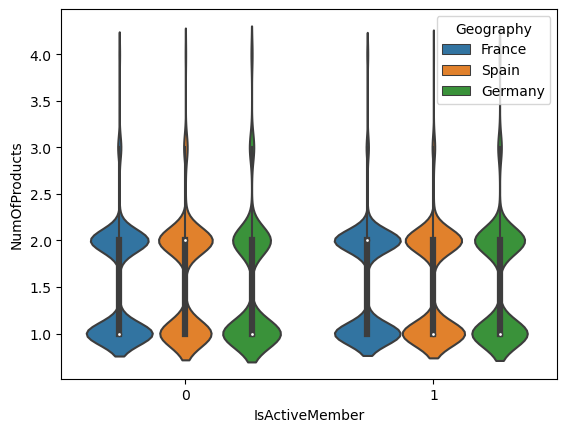

In [34]:
sns.violinplot(x="IsActiveMember",y="NumOfProducts",data=data,hue="Geography")

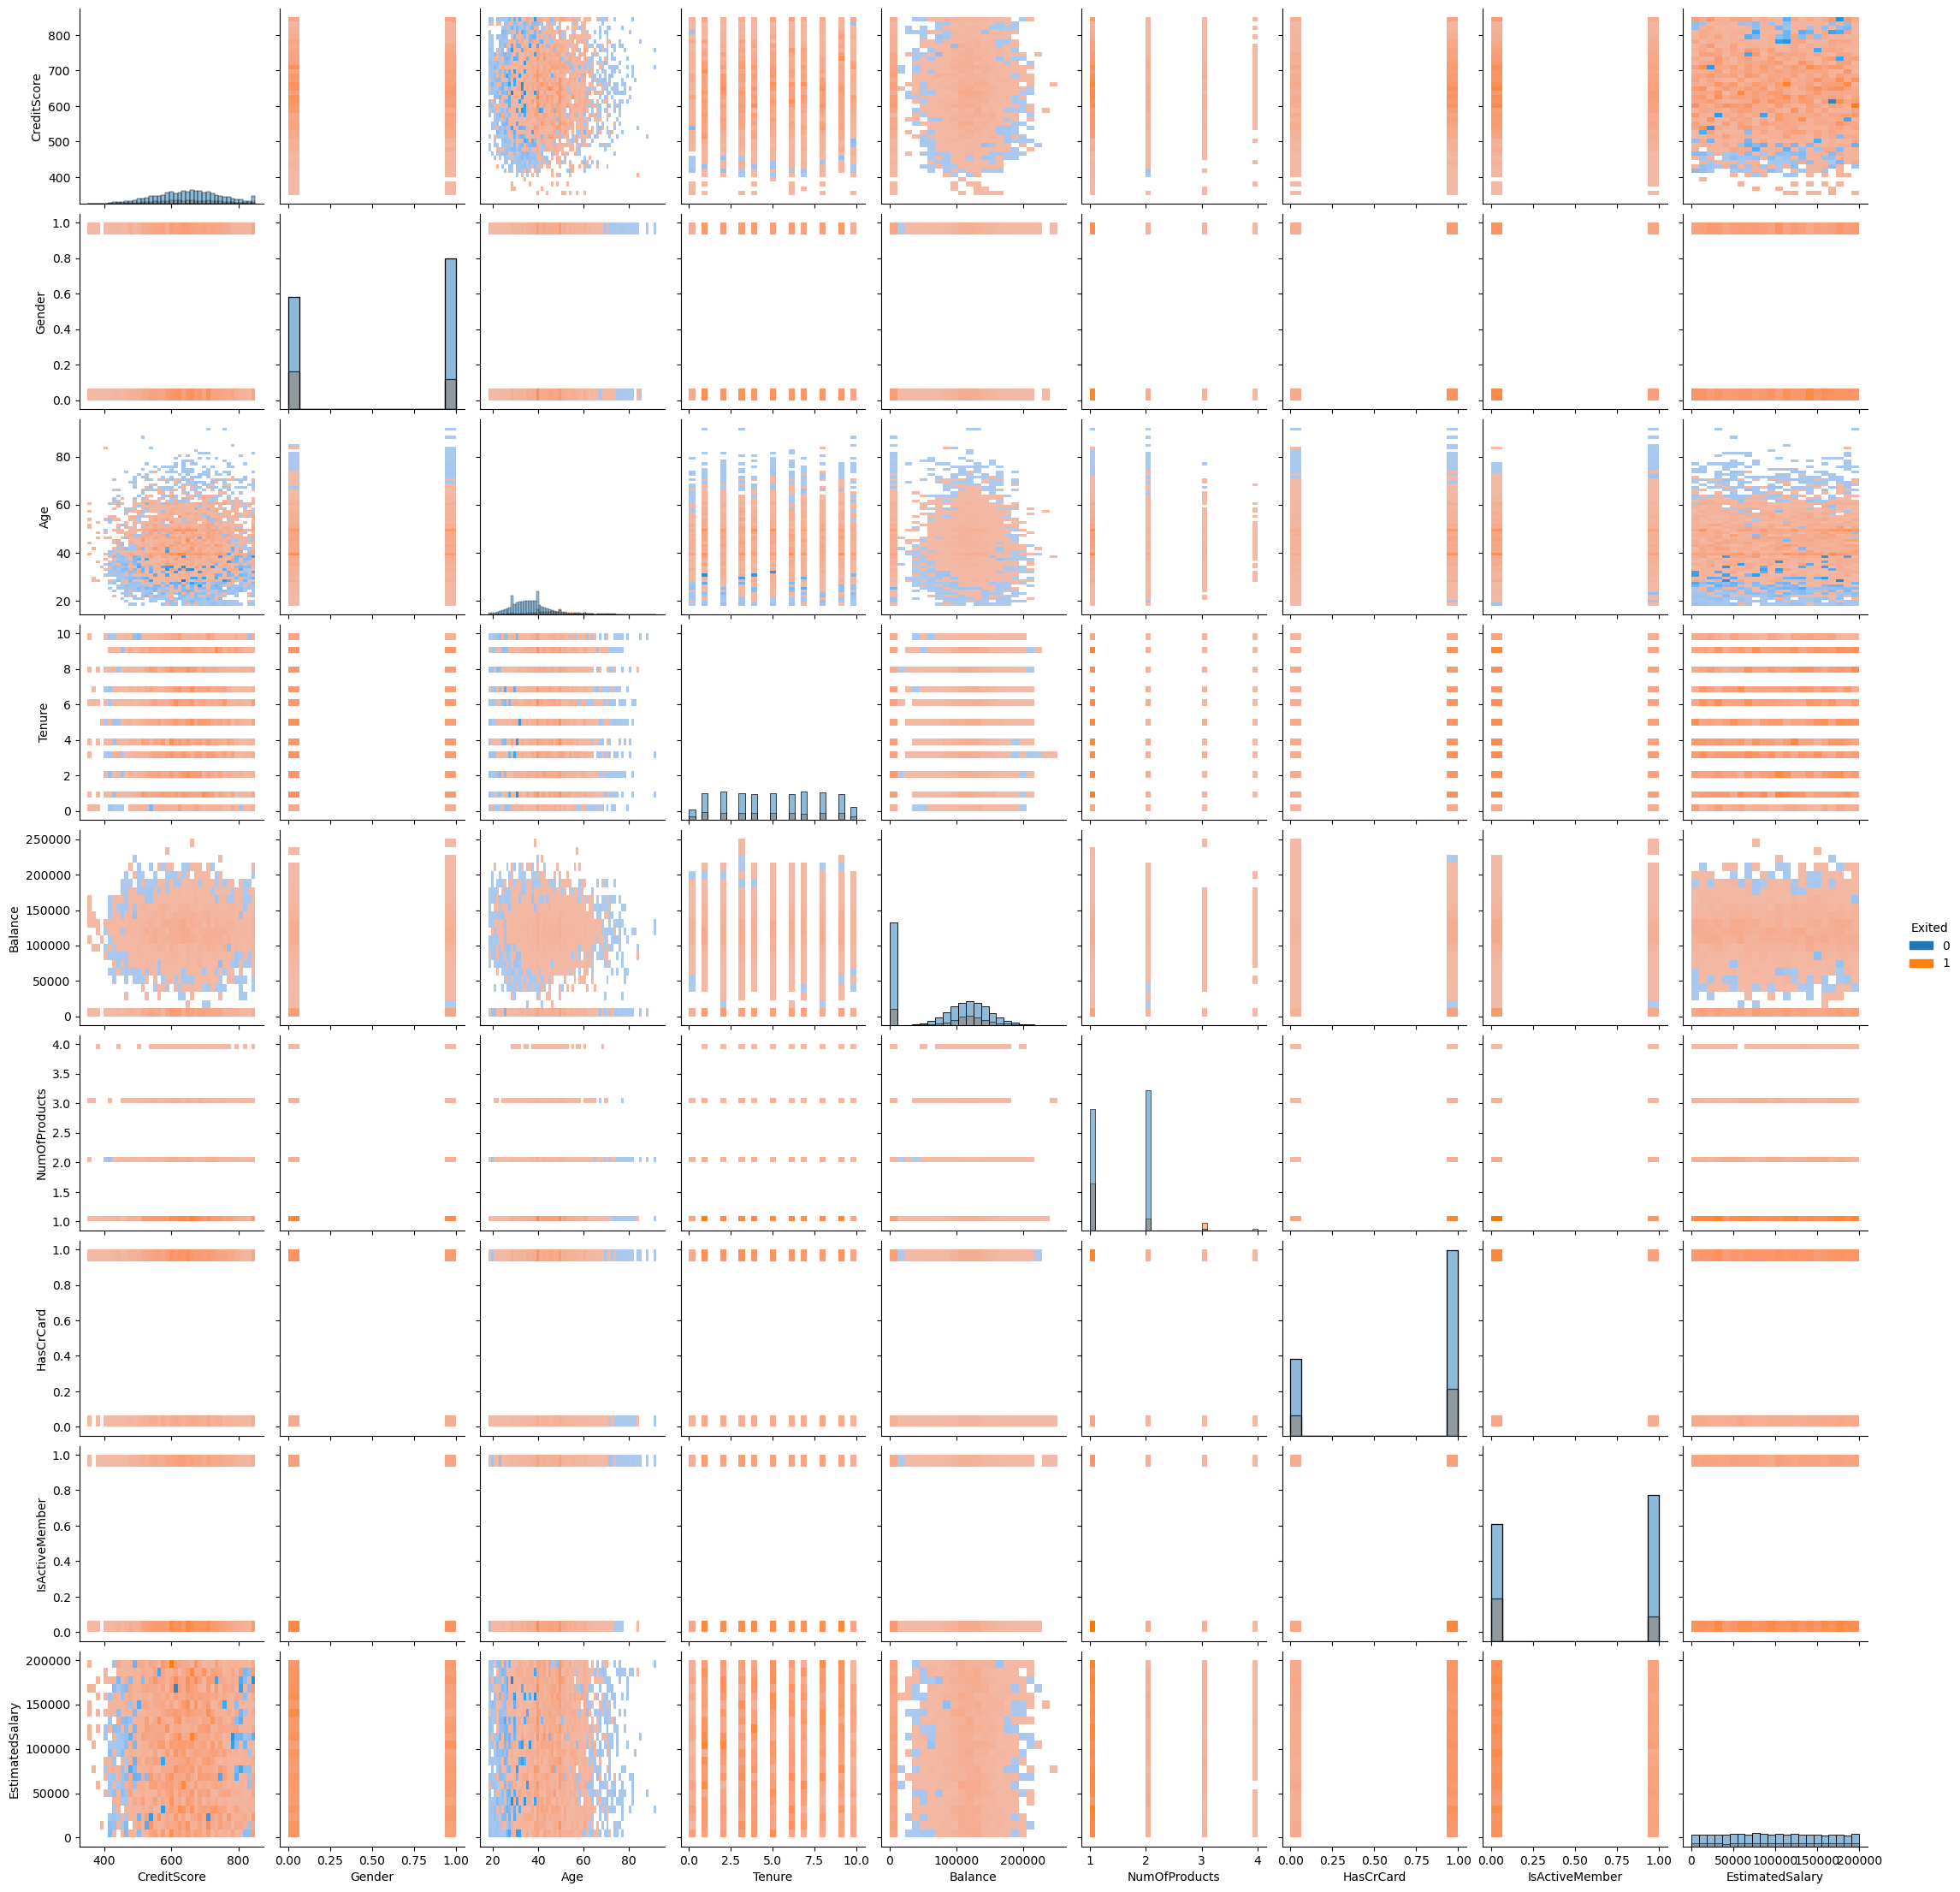

In [38]:
sns.pairplot(data=data,hue="Exited",kind='hist')

<AxesSubplot:xlabel='Exited', ylabel='Age'>

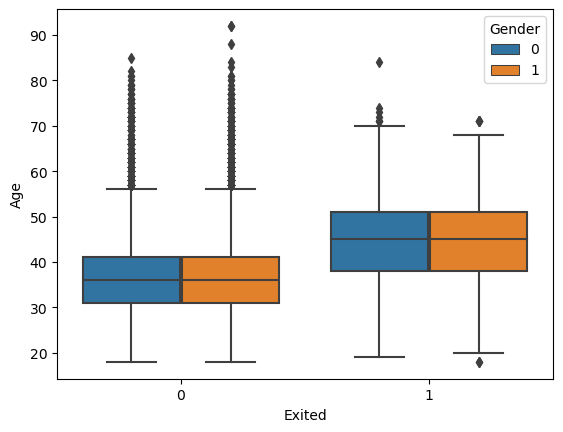

In [39]:
sns.boxplot(x="Exited",y="Age",data=data,hue="Gender")

# Identify and remove outliers

In [40]:
q1=data["Age"].quantile(0.25)
q3=data["Age"].quantile(0.75)
iq=q3-q1
data=data[~((data["Age"]<(q1-1.5*iq))|(data["Age"]>(q3+1.5*iq)))]


In [41]:
q1=data["CreditScore"].quantile(0.25)
q3=data["CreditScore"].quantile(0.75)
iq=q3-q1
data=data[~((data["CreditScore"]<(q1-1.5*iq))|(data["CreditScore"]>(q3+1.5*iq)))]

In [42]:
data[(data["Age"]<(data["Age"].mean()-3*data["Age"].std()))|(data["Age"]>(data["Age"].mean()+3*data["Age"].std()))]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Encoding Geography column by dummy variable technique

In [43]:
geo=pd.get_dummies(data["Geography"],drop_first=True)
data1=pd.concat([data,geo],axis=1)
data1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1,0


# Split data into dependent and independent features

In [44]:
x=data1.drop(columns=["Geography","Exited"])
y=data["Exited"]
x.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,Onio,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,1


# Splitting data into train and test dataset

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [49]:
x_train.shape,x_test.shape

((7701, 12), (1926, 12))